In [1]:
%matplotlib inline

import sys
sys.path.append('/home/wt/py_projects/Human-Pose-Estimation-3D')

import numpy as np
import matplotlib.pyplot as plt
from datasets.custom_dataset import Custom_dataset

In [156]:
dir_path = '../data/'
data_path = dir_path + 'data_2d_custom_gt.npz'
data_path_3d = dir_path + 'data_3d_custom.npz'
predict_path = '/home/wt/py_projects/Human-Pose-Estimation-3D/outputs/2022-01-08/21-19-11/predict.npz'
keypoints = np.load(data_path, allow_pickle=True)['positions_2d'].item()
dataset = Custom_dataset(data_path_3d)
predict_3d = np.load(predict_path,allow_pickle=True)['predict_3d'].item()

for k in predict_3d['P000'].keys():
    print(k)

subject = 'P000'
action = 'A001'
camera = 'C002'
seg = 0
frame = 50

kps = keypoints[subject][action][camera][seg]
anim = dataset[subject][action][camera][seg]
predicts = predict_3d[subject][action][camera][seg]

print(kps.shape)
print(anim.shape)


coordinates_2d = kps[frame]
coordinates_3d = anim[frame] 
coordinates_3d_pre = predicts[frame]
print(coordinates_2d)
print(coordinates_3d)
print(coordinates_3d_pre)


Preparing Custom Dataset...
A005
A001
A002
A003
A004
(75, 21, 2)
(75, 21, 3)
[[347.5     292.7    ]
 [350.3937  258.6614 ]
 [351.1811  231.10236]
 [350.7874  218.50394]
 [349.6063  195.6693 ]
 [370.86615 237.79527]
 [373.62204 267.71652]
 [374.40945 298.8189 ]
 [373.62204 307.48032]
 [334.25198 230.31496]
 [320.47244 223.62204]
 [335.43307 197.6378 ]
 [342.12598 187.79527]
 [360.3     294.2    ]
 [357.87402 348.8189 ]
 [353.937   385.43307]
 [361.41733 400.     ]
 [334.      293.6    ]
 [329.92126 346.063  ]
 [329.52756 385.03937]
 [324.40945 397.24408]]
[[ 258.42828   323.72717  2967.321   ]
 [ 264.22073    59.208664 2903.9556  ]
 [ 280.95737  -159.83847  3002.3218  ]
 [ 281.00885  -248.47916  2972.1404  ]
 [ 275.58536  -427.1322   3070.7517  ]
 [ 455.6969    -70.14639  3082.564   ]
 [ 466.7549    188.78973  2960.4905  ]
 [ 454.59534   385.84286  2924.1719  ]
 [ 443.7769    443.49265  2908.2236  ]
 [ 122.227264 -130.06552  3061.4736  ]
 [  19.151402 -176.70596  2819.7236  ]
 [ 122.114

In [157]:
skeleton = dataset.skeleton()

joint_pairs = [[p, i] for i, p in enumerate(skeleton.parents())]
joint_pairs.pop(0)

colors_kps = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0],
              [50, 205, 50], [0, 255, 170], [0, 255, 255], [
                  0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255],
              [170, 0, 255], [255, 0, 255], [42, 85, 255], [0, 42, 255], [255, 0, 42], [255, 42, 0]]


def plot_keypoint(coordinates):
    fig = plt.figure(figsize=(8, 8))
    x_max = coordinates[:, 0].max()
    x_min = coordinates[:, 0].min()
    y_max = coordinates[:, 1].max()
    y_min = coordinates[:, 1].min()
    # axes.set_xlim([0,h36m_cameras_intrinsic_params['res_w']])
    # axes.set_ylim([h36m_cameras_intrinsic_params['res_h'],0])
    plt.xlim(x_min-20, x_max+20)
    plt.ylim(y_max+20, y_min-20)
    plt.axis('equal')

    for i in range(coordinates.shape[0]):
        pts = coordinates[i]
        for color_i, jp in zip(colors_kps, joint_pairs):
            color_i = [c / 255 for c in color_i]
            pt_a = coordinates[jp[0]]
            pt_b = coordinates[jp[1]]
            # pt_a_x, pt_a_y, pt_b_x, pt_b_y = int(pt_a[0]), int(
            #     pt_a[1]), int(pt_b[0]), int(pt_b[1])
            pt_a_x, pt_a_y, pt_b_x, pt_b_y = pt_a[0], pt_a[1], pt_b[0], pt_b[1]
            plt.plot((pt_a_x, pt_b_x), (pt_a_y, pt_b_y), color=color_i, lw=2.0)
            plt.plot(pt_a_x, pt_a_y, marker='o', color=color_i)
            plt.plot(pt_b_x, pt_b_y, marker='o', color=color_i)


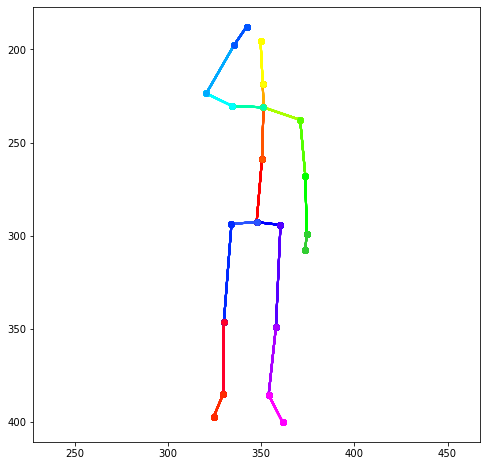

In [158]:
plot_keypoint(coordinates_2d)

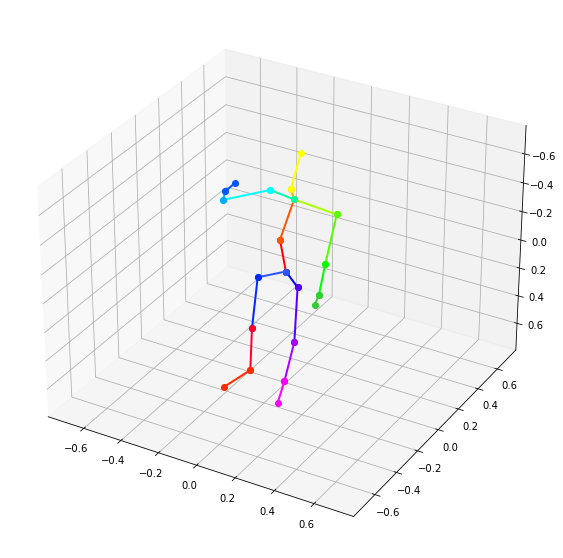

In [159]:
joints = coordinates_3d / 1000
joints[1:] -= joints[0]
joints[0] = 0

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')

ymin = joints.min()
ymax = joints.max()

ax.set_zlim([ymax,ymin])
ax.set_xlim([ymin,ymax])
ax.set_ylim([ymin,ymax])

# ax.set_aspect('equal')

for color_i, jp in zip(colors_kps, joint_pairs):
    color_i = [c / 255 for c in color_i]
    pt_a = joints[jp[0]]
    pt_b = joints[jp[1]]
    # print(pt_a,pt_b)
    pt_a_x, pt_a_y, pt_a_z, pt_b_x, pt_b_y, pt_b_z = pt_a[
        0],   pt_a[1], pt_a[2], pt_b[0], pt_b[1], pt_b[2]
    # print(pt_a_z,pt_b_z)

    ax.plot((pt_a_x, pt_b_x), (pt_a_z, pt_b_z),
            (pt_a_y, pt_b_y), lw=2.0, c=color_i)
    ax.plot(pt_a_x, pt_a_z, pt_a_y, marker='o', color=color_i)
    ax.plot(pt_b_x, pt_b_z, pt_b_y, marker='o', color=color_i)

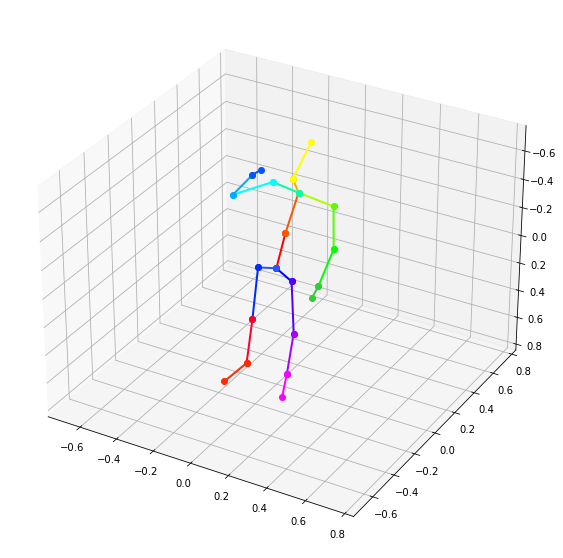

In [160]:
joints = coordinates_3d_pre
joints[1:] -= joints[0]
joints[0] = 0

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')

ymin = joints.min()
ymax = joints.max()

ax.set_zlim([ymax,ymin])
ax.set_xlim([ymin,ymax])
ax.set_ylim([ymin,ymax])

# ax.set_aspect('equal')

for color_i, jp in zip(colors_kps, joint_pairs):
    color_i = [c / 255 for c in color_i]
    pt_a = joints[jp[0]]
    pt_b = joints[jp[1]]
    # print(pt_a,pt_b)
    pt_a_x, pt_a_y, pt_a_z, pt_b_x, pt_b_y, pt_b_z = pt_a[
        0],   pt_a[1], pt_a[2], pt_b[0], pt_b[1], pt_b[2]
    # print(pt_a_z,pt_b_z)

    ax.plot((pt_a_x, pt_b_x), (pt_a_z, pt_b_z),
            (pt_a_y, pt_b_y), lw=2.0, c=color_i)
    ax.plot(pt_a_x, pt_a_z, pt_a_y, marker='o', color=color_i)
    ax.plot(pt_b_x, pt_b_z, pt_b_y, marker='o', color=color_i)